In [1]:
import pandas as pd
df=pd.read_csv('Salary_Data.csv')

In [2]:
#list of all columns in table
df.columns
df.columns.values

#list dtype of each column
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [3]:
import numpy as np
data = np.random.rand(12)
#series - 1D list objects
series = pd.Series(data=data, dtype='float64')
series = pd.Series([1, 2, 3], index=['a', 'b', 'c']) #index can be abything, by default it is numbers from 0 to n-1
series = pd.Series({'a':1, 'b':2, 'c':3}) #from dictionary

#series can be constructed using scaler, df cannot

In [4]:
#dataframe - 2D list objects
df = pd.DataFrame() #vanilla
df = pd.DataFrame([5, 6]) # == pd.DataFrame([[5], [6]])
df = pd.DataFrame([[5,6]]) 
df = pd.DataFrame([[5, 6], [1, 3]],
                  index=['r1', 'r2'],
                  columns=['c1', 'c2'])

df = pd.DataFrame({'c1': [1, 2], 'c2': [3, 4]}, index=['r1', 'r2']) 
#df cannnot be created using scaler

In [5]:
#appending
df = pd.DataFrame([[5, 6], [1.2, 3]])
df1 = pd.DataFrame([['a', 1], ['b', 2]])
df2 = pd.DataFrame([['c', 3], ['d', 4]])
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']])
mlb_df1 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
mlb_df2 = pd.DataFrame([['bird', '2'], ['monkey', '2']],
                   columns=['animal', 'legs'])

df_app = df.append(pd.Series([0, 0], name='r3'))#appending new row
df_app = df.append(df2, ignore_index=True) #changes row label to integer indexes

#concatenating
concat = pd.concat([df1, df2], axis=1)
concat = pd.concat([df2, df1, df3])

#merge
mlb_merged = pd.merge(mlb_df1, mlb_df2) #merges on same row labels and column values

/tmp/ipykernel_808/865526834.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_app = df.append(pd.Series([0, 0], name='r3'))#appending new row
/tmp/ipykernel_808/865526834.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_app = df.append(df2, ignore_index=True) #changes row label to integer indexes


In [6]:
df = df.append(pd.Series([0, 0], name='r3'))#appending new row

/tmp/ipykernel_808/368044058.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series([0, 0], name='r3'))#appending new row


In [7]:
df = pd.DataFrame([[5, 6,7], [1.2, 3, 4.5],[-4, -2, 0], [45,67,89]], columns=['c1', 'c2', 'c3'], index=['r1', 'r2', 'r3', 'r4'])

In [8]:
#dropping data
#generic - can't simultaneously drop both rows and columns. Need to use specific arguments to do so.
df_drop = df.drop(labels='r3', axis=0)  #drop rows by label
df_drop = df.drop(labels=['c1', 'c3'], axis=1) #drop columns by label

#specific
df_drop = df.drop(index='r3') #drop rows by index
df_drop = df.drop(columns=['c1', 'c3']) #drop columns by col names directly

#drop rows an columns
df.drop(index='r2', columns='c2')

,c1,c3
r1,5.0,7.0
r3,-4.0,0.0
r4,45.0,89.0


In [9]:
#indexing in pandas
col1 = df['c1'] #does not return first row as column name
col1_df = df[['c1']] #returns first row as column name
col23 = df[['c2', 'c3']]

#getting rows
first_two_rows = df[0:2] #integer end index is exclusive
rows_from_to = df['r2':'r3'] #label end index in inclusive

#using loc an iloc
#iloc to access rows based on their integer index
bool_list = [True, False, True, False]
df.iloc[1]
df.iloc[[0, 2]]
df.iloc[bool_list]

#loc property provides the same row indexing functionality as iloc, but uses row labels rather than integer indexes
df.loc['r2']
df.loc[bool_list]
df.loc[['r1', 'r3'], 'c2']
df.loc[['r3','r4'], 'c2'] = 12 #use fd loc to set values

#we can't access columns on their own with loc or iloc

In [10]:
#File IO
#reading
df = pd.read_csv('Salary_Data.csv', index_col=0)
df = pd.read_excel('data.xlsx', sheet_name=1)
df = pd.read_json('data_file.json')

#writing
# Index is kept when writing
mlb_df1.to_csv('data.csv')
# Index is not kept when writing
mlb_df2.to_csv('data.csv', index=False)

df.to_json('data.json')

In [11]:
import seaborn as sns
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [12]:
#Grouping in pandas
groups = df.groupby('sex')
groups = df.groupby(['sex', 'embark_town'])

In [13]:
#filtering in pandas-- return t/f array
Southampton = df['embark_town'] == 'Southampton'
fare40 = df['fare'] > 40
notFirst = df['class'] != 'First'

#using functions
str_f1 = df['embark_town'].str.startswith('C')
str_f2 = df['class'].str.endswith('S')
str_f3 = ~df['who'].str.contains('o')


#using isin
isin_f1 = df['embark_town'].isin(['Southampton','Queenstown'])
isin_f2 = df['sibsp'].isin([0, 1])

#check na -- returnf t/f boolean array od positions passed in indexing
isna = df['pclass'].isna()
notna = df['pclass'].notna()


#using filtering to directly get data
fare40_df = df[df['fare'] > 40]
not_fare30_df = df[~(df['fare'] > 30)]
str_df = df[df['class'].str.startswith('F')]

In [14]:
#sorting in pandas
sort1 = df.sort_values('age')
sort2 = df.sort_values('fare', ascending=False)
sort1 = df.sort_values(['age', 'fare'])
sort2 = df.sort_values(['age', 'fare'],ascending=[True, False])

In [15]:
#metrics in pandas

#continuous variables
metrics1 = df.describe()
hr_rbi = df[['age','fare']].describe()
metrics1 = hr_rbi.describe(percentiles=[.5]) #also the median value
metrics3 = hr_rbi.describe(percentiles=[.2,.8])

#categorical columns
df['age'].value_counts()
df['age'].value_counts(normalize=True) #sum of all proportions =1
df['age'].value_counts(ascending=True)
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

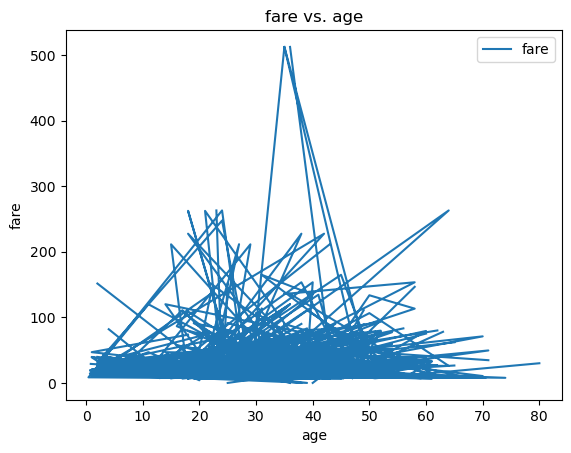

<Figure size 640x480 with 0 Axes>

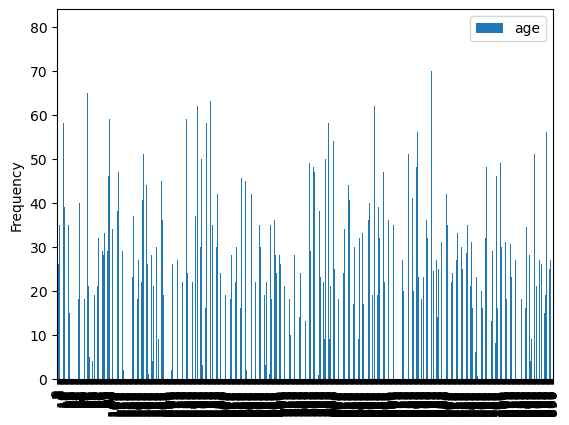

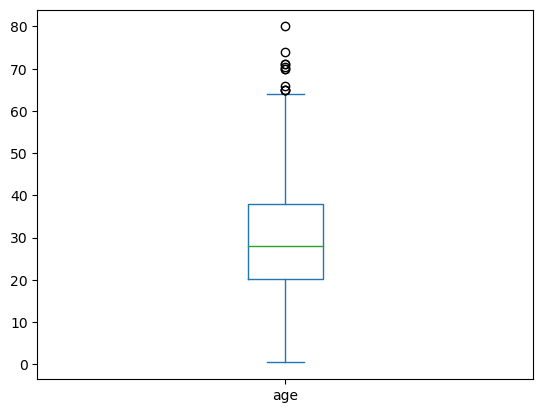

<AxesSubplot: xlabel='age'>

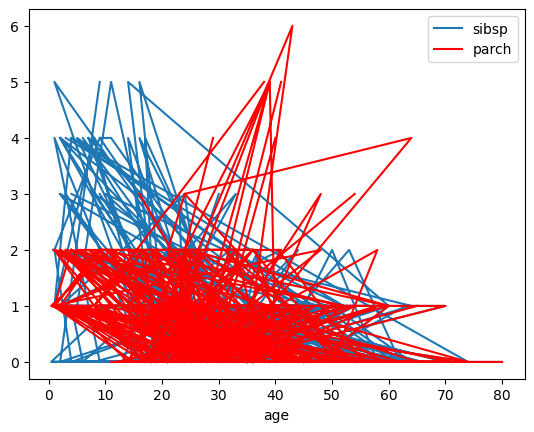

In [16]:
#plotting in pandas
import matplotlib.pyplot as plt
#line
df.plot(kind='line',x='age',y='fare')
plt.title('fare vs. age')
plt.xlabel('age')
plt.ylabel('fare')
plt.show()
plt.savefig('legend.png')  # save to PNG file

#bar
df.plot(kind='bar',y='age')
plt.ylabel('Frequency')
plt.show()

#box
df.plot(kind='box',y='age')
plt.show()


#plot multiple features
ax = plt.gca()# gca stands for 'get current axis'

df.plot(kind='line',x='age',y='sibsp',ax=ax)
df.plot(kind='line',x='age',y='parch', color='red', ax=ax)


In [17]:
#pandas math
#multiply two series
multiplied=df['age']*df['fare'] #element wise multiplication

#sum a series
summ = df['age'].sum()

#divide two columns in df 
divided = df['fare']/df['age']

#### Quick hacks

In [18]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)